# El_bands of PbF2


In [2]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
import numpy as np
import matplotlib.pyplot as plt
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter

with MPRester("rxafJw6hy0L68C4ZGJP1j4UXfbE4nmS8" ) as m:
    s= m.get_structure_by_material_id("mp-315")
    band= m.get_bandstructure_by_material_id("mp-315")
    

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Bande interdite

{'direct': False, 'energy': 4.3938, 'transition': 'W-X'}


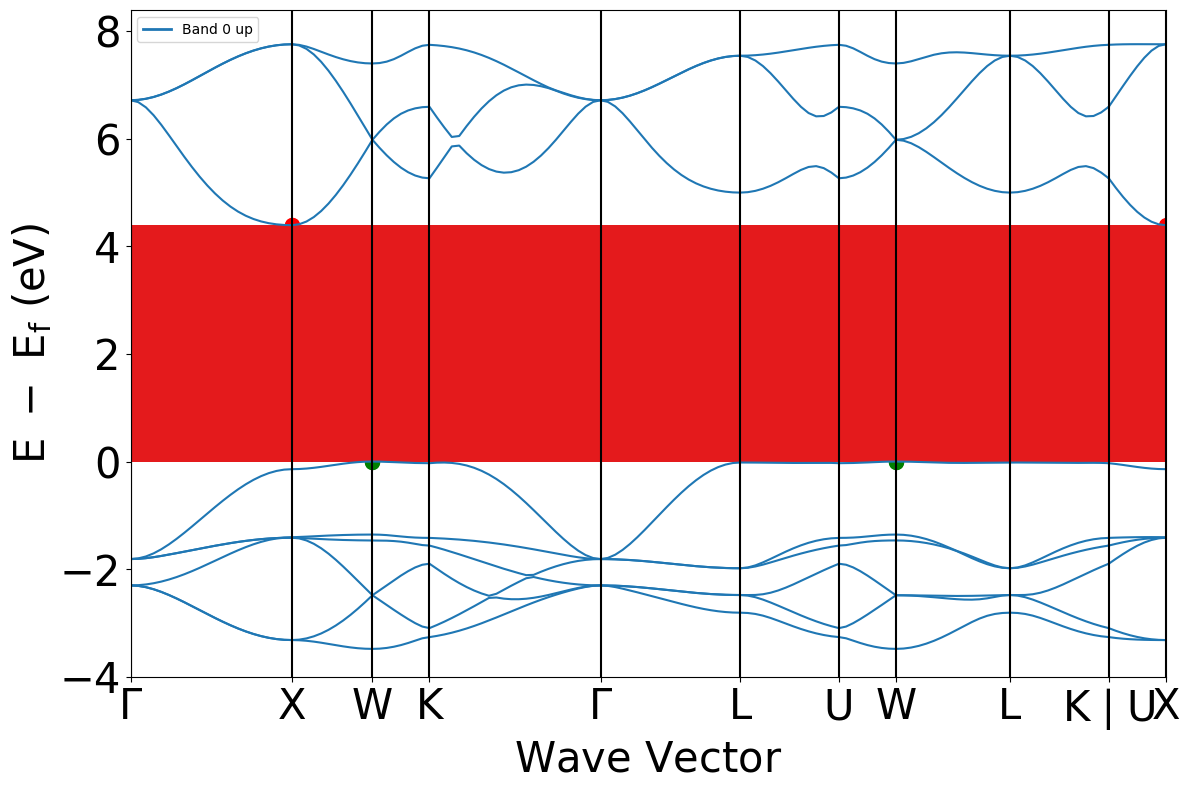

In [3]:
plotter = BSPlotter(band)
print(band.get_band_gap())

b_energy = band.get_band_gap().get('energy')
plot_data = BSPlotter(band).bs_plot_data()
d = plot_data.get('ticks').get('distance')
BSPlotter(band).get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(d[0], d[-1], 400), 0, b_energy)

     La bande est indirect avec une énergie de 4.3938 eV.

# Direction de dispersion de la dernière bande de valence et de la première bande de conduction

Détermination de la première bande de conduction et de la dernière bande de valence

In [4]:
E_cond = band.get_cbm()['energy'] #énergie de la première bande de conduction
E_val=  band.get_vbm()['energy'] #énergie de la dernière bande de valence

print(band.get_vbm()['band_index'] , " --> L'index de la dernière bande de valence est 13")  
index_dernier_val = 13  #index de la dernière bande de valence


print(band.get_cbm()['band_index']  , " --> L'index de la première bande de conduction est 14")
index_prem_cond = 14  #index de la première bande de conduction

defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})  --> L'index de la dernière bande de valence est 13
defaultdict(<class 'list'>, {<Spin.up: 1>: [14]})  --> L'index de la première bande de conduction est 14


Calcul des pentes correcpondants aux dispertions minimales et maximales de la première bande de conduction et de la          dernière bande de valence et représentation des directions de la dispertion minimale et maximale sur la structure des bandes électroniques

La pente correspondant à la dispertion maximale de la première bande de conduction vaut 3.0283298248513937 , 
sa direction est Γ ( 1 ) vers X ( 2 ), représenté en jaune sur le graphe
La pente correspondant à la dispertion minimale de la première bande de conduction vaut -2.351765126346341 , 
sa direction est U ( 9 ) vers W ( 10 ), représenté en vert sur le graphe
La pente correspondant à la dispertion maximale de la dernière bande de valence vaut 1.976594201704134 , 
sa direction est W ( 4 ) vers L ( 5 ), représenté en rouge sur le graphe
La pente correspondant à la dispertion minimale de la dernière bande de valence vaut -1.602462579973112 , 
sa direction est L ( 3 ) vers K ( 4 ), représenté en bleu sur le graphe


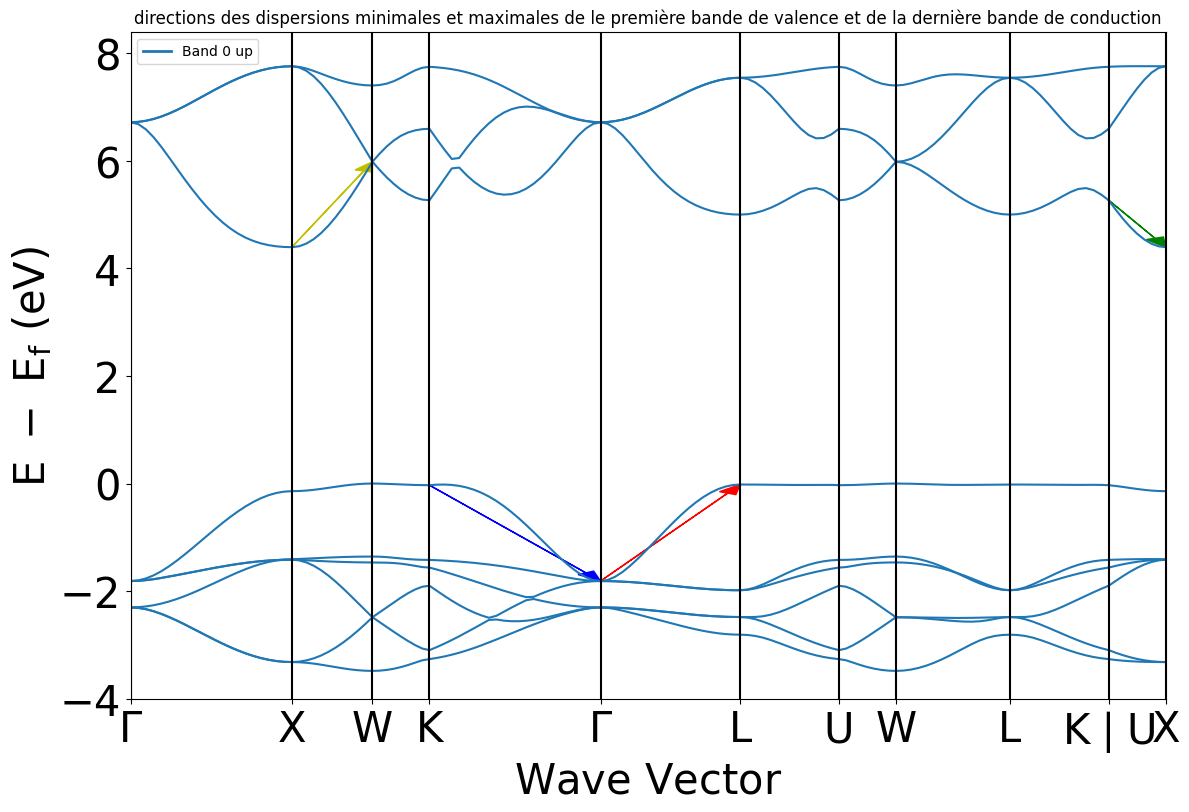

In [8]:
absc = np.unique(d) #matrice des abscisses
energy_band = plot_data.get('energy').get('1') #matrice des énergies des différentes bandes

dispersion_val = np.zeros(10)
dispersion_cond = np.zeros(10)

for i in range(10):
    dabsc= absc[i+1]-absc[i]
    dispersion_val[i] = (energy_band[i][index_dernier_val][-1] - energy_band[i][index_dernier_val][0])/dabsc
    dispersion_cond[i] = (energy_band[i][index_prem_cond][-1] - energy_band[i][index_prem_cond][0])/dabsc

index_disp_val_max = np.argmax(dispersion_val)
index_disp_val_min = np.argmin(dispersion_val)
index_disp_cond_max = np.argmax(dispersion_cond)
index_disp_cond_min = np.argmin(dispersion_cond)


print("La pente correspondant à la dispertion maximale de la première bande de conduction vaut" , dispersion_cond[index_disp_cond_max] ,
      ", \nsa direction est Γ (" ,index_disp_cond_max, ") vers X (" ,index_disp_cond_max+1, "), représenté en jaune sur le graphe")
print("La pente correspondant à la dispertion minimale de la première bande de conduction vaut" , dispersion_cond[index_disp_cond_min] ,
      ", \nsa direction est U (" ,index_disp_cond_min, ") vers W (" ,index_disp_cond_min+1, "), représenté en vert sur le graphe")
print("La pente correspondant à la dispertion maximale de la dernière bande de valence vaut" , dispersion_val[index_disp_val_max] ,
      ", \nsa direction est W (" ,index_disp_val_max, ") vers L (" ,index_disp_val_max+1, "), représenté en rouge sur le graphe")
print("La pente correspondant à la dispertion minimale de la dernière bande de valence vaut" , dispersion_val[index_disp_val_min] ,
      ", \nsa direction est L (" ,index_disp_val_min, ") vers K (" ,index_disp_val_min+1, "), représenté en bleu sur le graphe")



BSPlotter(band).get_plot()
plt.title("directions des dispersions minimales et maximales de le première bande de valence et de la dernière bande de conduction")
plt.arrow(absc[4], energy_band[4][index_dernier_val][0], absc[4+1]-absc[4],energy_band[4][index_dernier_val][-1] - energy_band[4][index_dernier_val][0] ,color = 'r',head_width = 0.12,length_includes_head=True) 
plt.arrow(absc[3], energy_band[3][index_dernier_val][0], absc[3+1]-absc[3],energy_band[3][index_dernier_val][-1] - energy_band[3][index_dernier_val][0] , color = 'b', head_width = 0.12,length_includes_head=True) 
plt.arrow(absc[1], energy_band[1][index_prem_cond][0], absc[1+1]-absc[1],energy_band[1][index_prem_cond][-1] - energy_band[1][index_prem_cond][0] , color = 'y', head_width = 0.12,length_includes_head=True) 
plt.arrow(absc[9], energy_band[9][index_prem_cond][0], absc[9+1]-absc[9],energy_band[9][index_prem_cond][-1] - energy_band[9][index_prem_cond][0] , color = 'g', head_width = 0.12,length_includes_head=True) 
plt.show()



# Masse effective

On calcul la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une
dispersion parabolique. Pour celà, on utilise la formule ci-dessous:
    
    

$$ m^{*} = \frac{\tilde{h}^{2} . k^{2}}{2. E(k)} = \frac{\tilde{h}^{2} . (k_{x}^{2}+k_{y}^{2}+k_{z}^{2})}{2. E(k)}$$

In [25]:
#valeurs des constantes
h = 6.62607015e-34 
eV = 1.6022e-19
hbar = h/(2*np.pi)


kval = band.get_vbm()['kpoint'].frac_coords*1e10
kcondu = band.get_cbm()['kpoint'].frac_coords*1e10

masse_v = (hbar**2 * (kval[0]**2+kval[1]**2+kval[2]**2))/(2*abs(E_val)*eV)
print('Masse effective au sommet de la dernière bande de valence vaut ' + str(masse_v)+' kg')

masse_c = (hbar**2 * (kcondu[0]**2+kcondu[1]**2+kcondu[2]**2))/(2*E_cond*eV)
print('Masse effective à la base de la première bande de conduction ' + str(masse_c)+' kg')





Masse effective au sommet de la dernière bande de valence vaut 1.9623794821535338e-30 kg
Masse effective à la base de la première bande de conduction 2.920748223580307e-31 kg
